Dataset: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [4]:
# correaltion

corr = df.corr(numeric_only=True)


In [5]:
corr

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


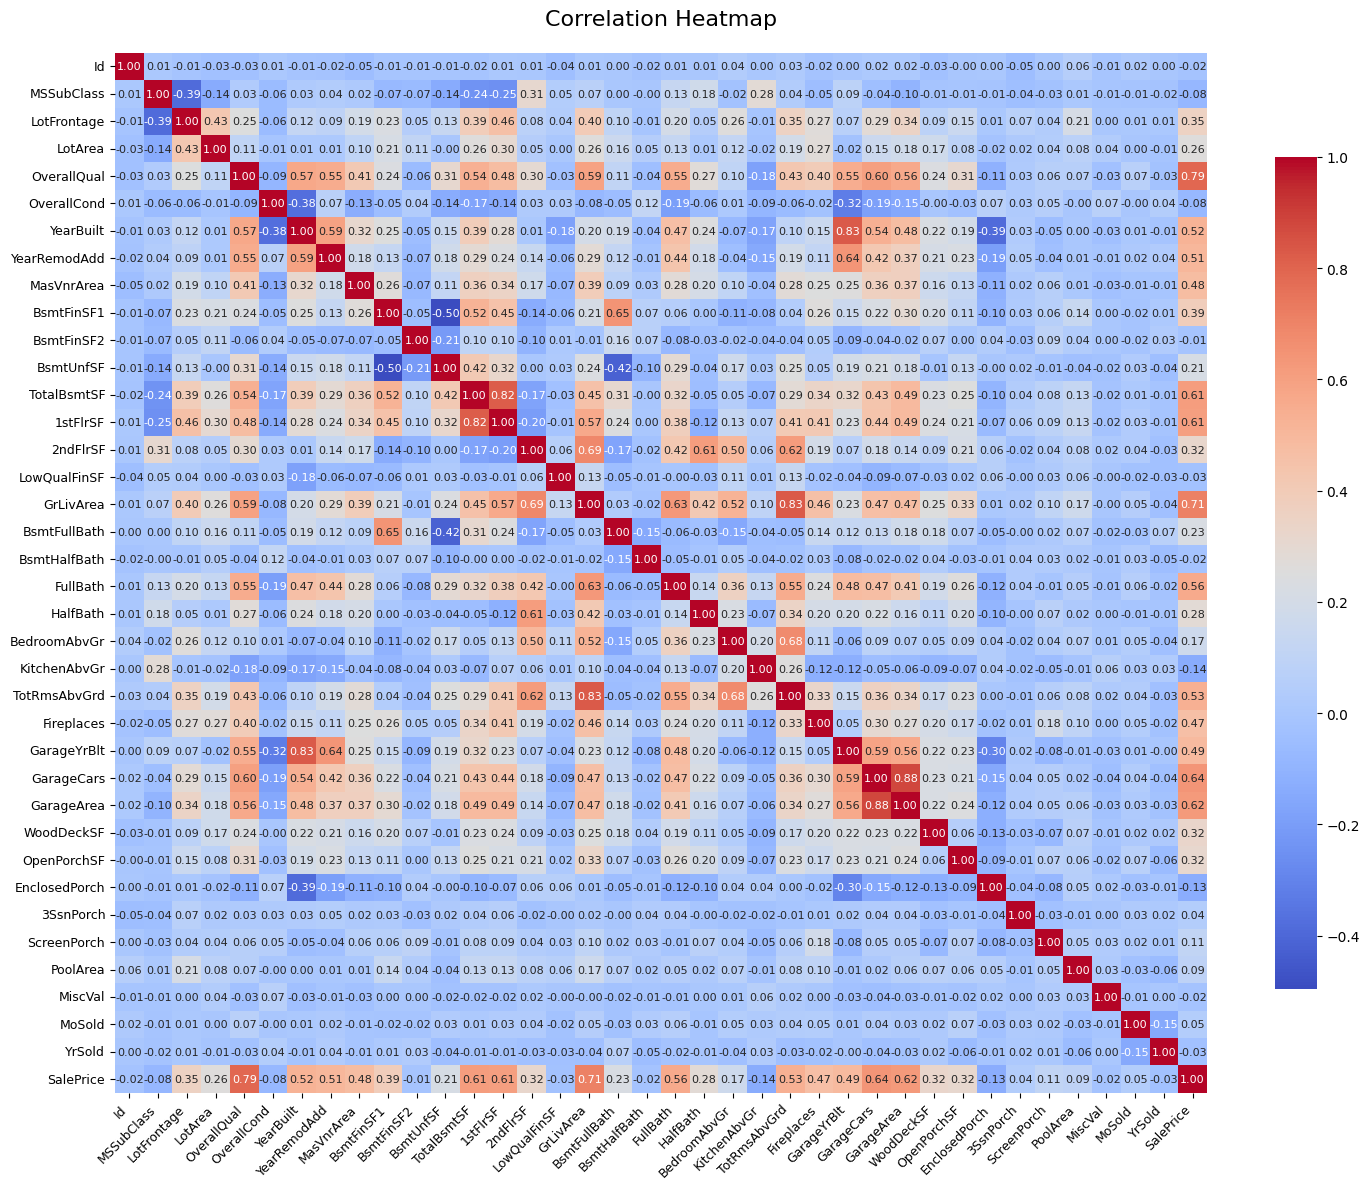

In [26]:
## Correlation Heatmap (Trimmed):-Instead of showing all variables, focus on correlations with SalePrice:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 12))  # Make the plot bigger
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr, 
    annot=True,           # Show correlation values
    fmt=".2f",             # Format numbers
    cmap="coolwarm",       # Color scheme
    annot_kws={"size": 8}, # Smaller font size for numbers
    cbar_kws={'shrink': 0.8}  # Shrink color bar
)

plt.xticks(rotation=45, ha='right', fontsize=9)  # Rotate x-axis labels
plt.yticks(fontsize=9)                           # Adjust y-axis label size
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [7]:
# from sklearn.datasets import fetch_openml

# # Select 20 impactful numeric features based on correlation with 'SalePrice'
# key_features = df[[
#     "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "YearBuilt",
#     "FullBath", "GarageCars", "GarageArea", "YearRemodAdd", "TotRmsAbvGrd",
#     "MasVnrArea", "LotArea", "Fireplaces", "BsmtFinSF1", "OpenPorchSF",
#     "WoodDeckSF", "HalfBath", "BsmtFullBath", "LotFrontage", "2ndFlrSF"
# ]]

# # Keep only those and the target
# df_subset = df[key_features + ["SalePrice"]].dropna()

# print(f"Selected dataset shape: {df_subset.shape}")
# df_subset.head()

In [9]:


# # Select 20 impactful numeric features based on correlation with 'SalePrice'
# key_features = [
#     "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "YearBuilt",
#     "FullBath", "GarageCars", "GarageArea", "YearRemodAdd", "TotRmsAbvGrd",
#     "MasVnrArea", "LotArea", "Fireplaces", "BsmtFinSF1", "OpenPorchSF",
#     "WoodDeckSF", "HalfBath", "BsmtFullBath", "LotFrontage", "2ndFlrSF"
# ]

# # Keep only those and the target
# # Use key_features + ["SalePrice"] to properly concatenate lists
# df_subset = df[key_features + ["SalePrice"]].dropna()

# print(f"Selected dataset shape: {df_subset.shape}")
# df_subset.head()

In [7]:
from sklearn.datasets import fetch_openml

# Load the dataset first
# Using fetch_openml to get the housing dataset
housing = fetch_openml(name="house_prices", version=1, as_frame=True)
df = housing.data
df["SalePrice"] = housing.target  # Add the target variable to the dataframe

# Select 20 impactful numeric features based on correlation with 'SalePrice'
# Check which columns actually exist in the dataset
available_columns = df.columns.tolist()
print("Available columns:", available_columns[:10], "...")  # Print first 10 columns to check

# Modify the key_features list to match available columns
# This is an example - you may need to adjust based on actual column names
key_features = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "YearBuilt",
    "FullBath", "GarageCars", "GarageArea", "YearRemodAdd", "TotRmsAbvGrd",
    "MasVnrArea", "LotArea", "Fireplaces", "BsmtFinSF1", "OpenPorchSF",
    "WoodDeckSF", "HalfBath", "BsmtFullBath", "LotFrontage", "2ndFlrSF"
]

# Filter to only include columns that exist in the dataset
existing_features = [col for col in key_features if col in df.columns]
print(f"Features found in dataset: {existing_features}")

# Keep only those and the target
if "SalePrice" in df.columns:
    df_subset = df[existing_features + ["SalePrice"]].dropna()
    print(f"Selected dataset shape: {df_subset.shape}")
    df_subset.head()
else:
    print("SalePrice column not found in the dataset")

Available columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities'] ...
Features found in dataset: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'GarageCars', 'GarageArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'MasVnrArea', 'LotArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', 'HalfBath', 'BsmtFullBath', 'LotFrontage', '2ndFlrSF']
Selected dataset shape: (1195, 21)


In [8]:
df_subset

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,GarageCars,GarageArea,YearRemodAdd,TotRmsAbvGrd,...,LotArea,Fireplaces,BsmtFinSF1,OpenPorchSF,WoodDeckSF,HalfBath,BsmtFullBath,LotFrontage,2ndFlrSF,SalePrice
0,7,1710,856,856,2003,2,2,548,2003,8,...,8450,0,706,61,0,1,1,65.0,854,208500
1,6,1262,1262,1262,1976,2,2,460,1976,6,...,9600,1,978,0,298,0,0,80.0,0,181500
2,7,1786,920,920,2001,2,2,608,2002,6,...,11250,1,486,42,0,1,1,68.0,866,223500
3,7,1717,756,961,1915,1,3,642,1970,7,...,9550,1,216,35,0,0,1,60.0,756,140000
4,8,2198,1145,1145,2000,2,3,836,2000,9,...,14260,1,655,84,192,1,1,84.0,1053,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953,953,1999,2,2,460,2000,7,...,7917,1,0,40,0,1,0,62.0,694,175000
1456,6,2073,1542,2073,1978,2,2,500,1988,7,...,13175,2,790,0,349,0,1,85.0,0,210000
1457,7,2340,1152,1188,1941,2,1,252,2006,9,...,9042,2,275,60,0,0,0,66.0,1152,266500
1458,5,1078,1078,1078,1950,1,1,240,1996,5,...,9717,0,49,0,366,0,1,68.0,0,142125


## Why These Features?
The selected features are among the most influential in predicting property value:

Quality & Living Space: OverallQual, GrLivArea, TotalBsmtSF

Structure: YearBuilt, YearRemodAdd, 1stFlrSF, 2ndFlrSF

Baths & Rooms: FullBath, HalfBath, TotRmsAbvGrd, BsmtFullBath

Garage & Exterior Features: GarageCars, GarageArea, Fireplaces, WoodDeckSF, OpenPorchSF

Lot Characteristics: LotArea, LotFrontage

Refinement: MasVnrArea

These capture both physical dimensions and qualitative assessments of the property.



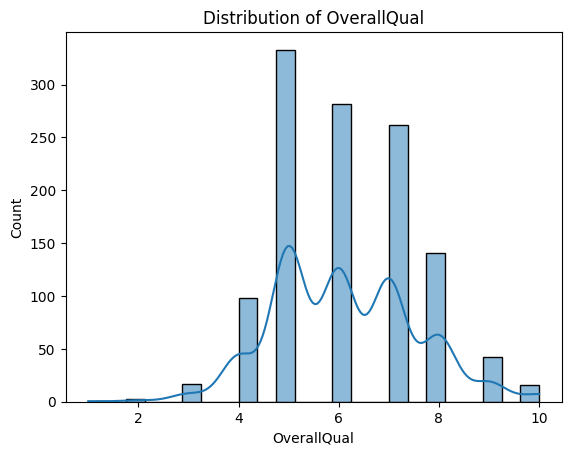

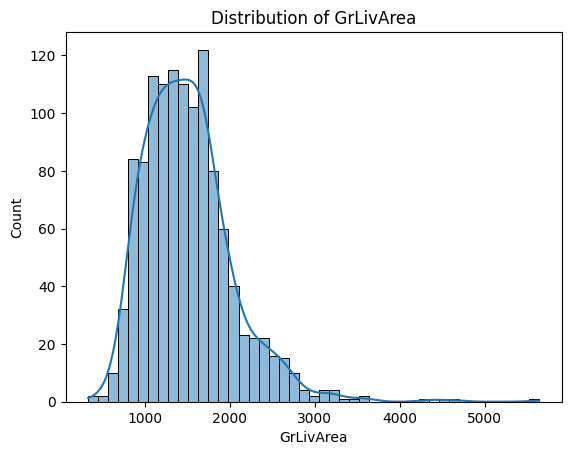

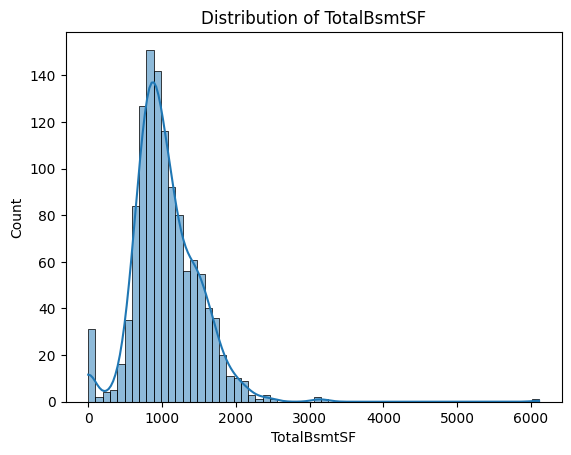

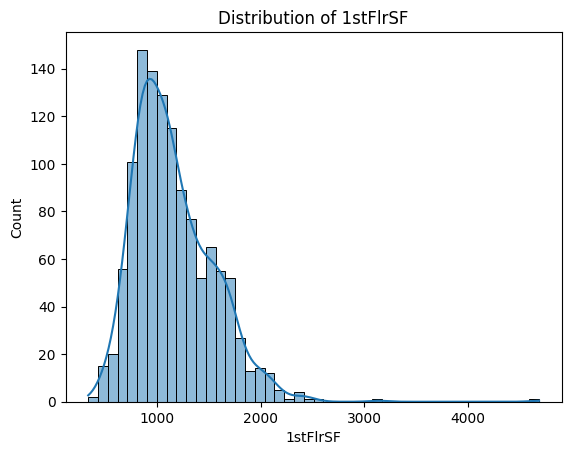

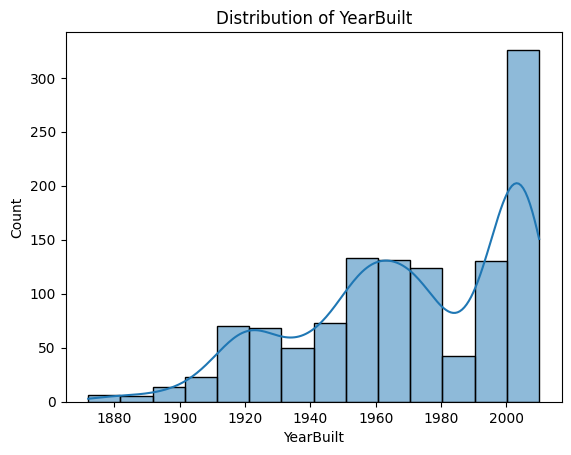

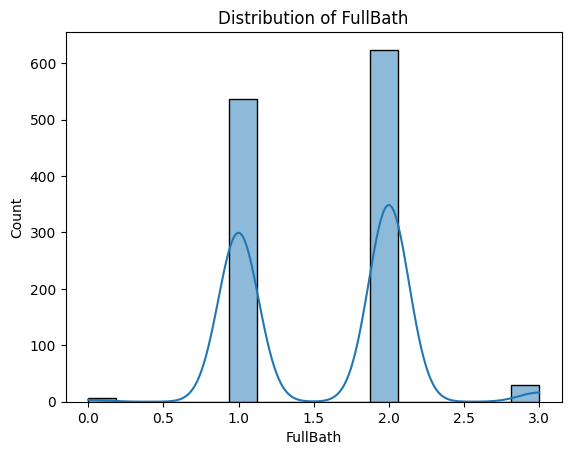

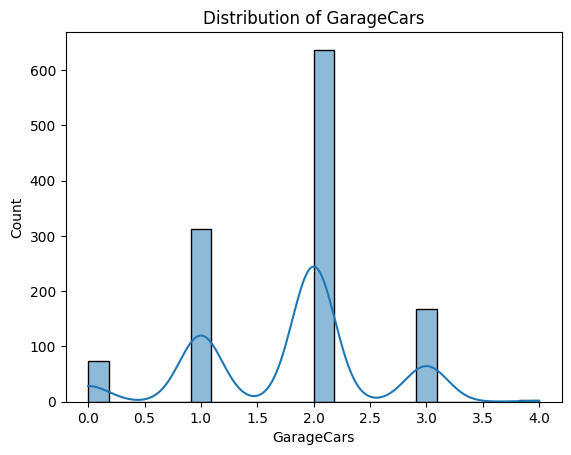

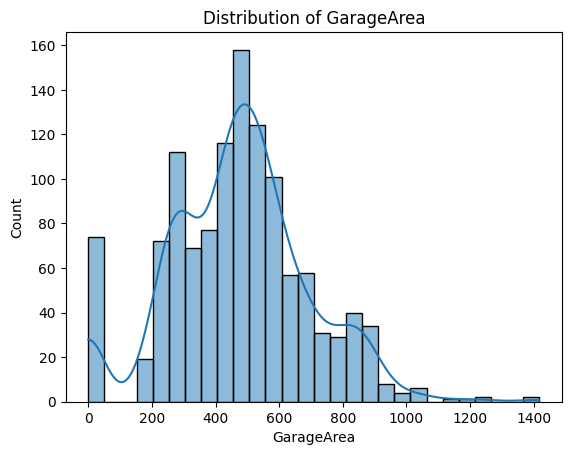

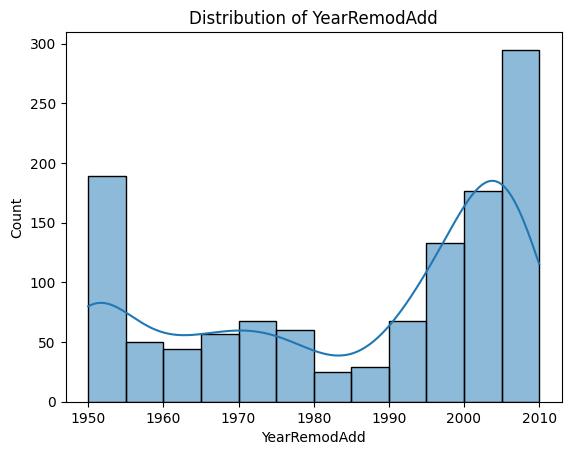

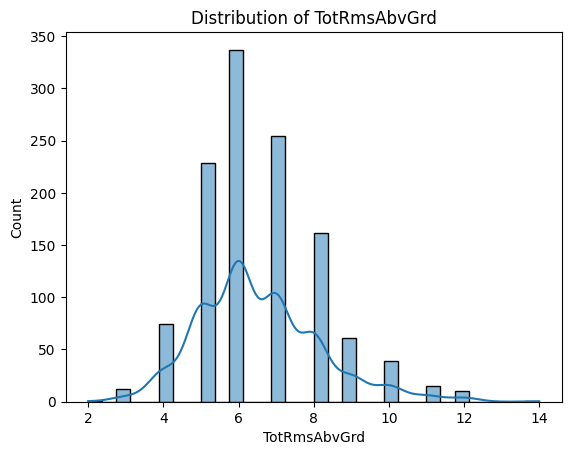

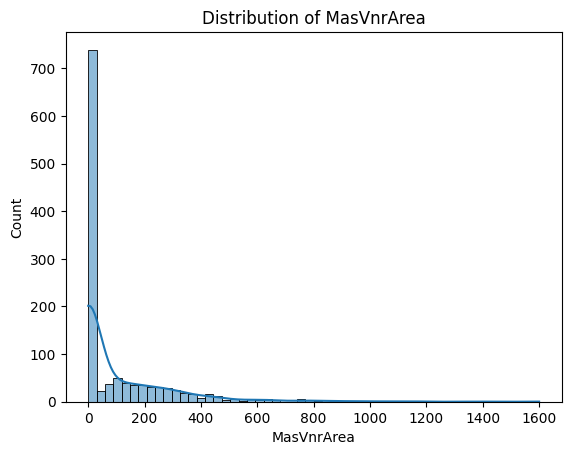

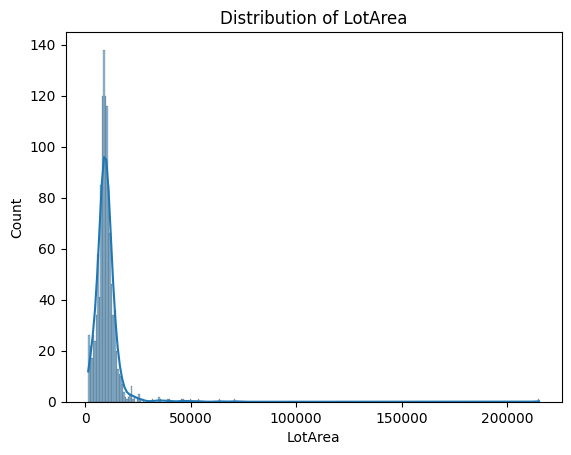

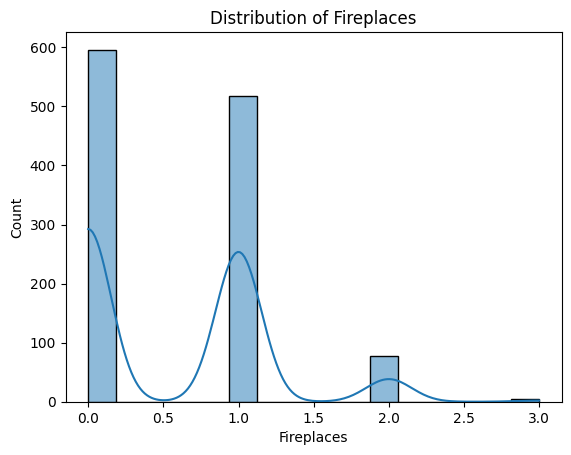

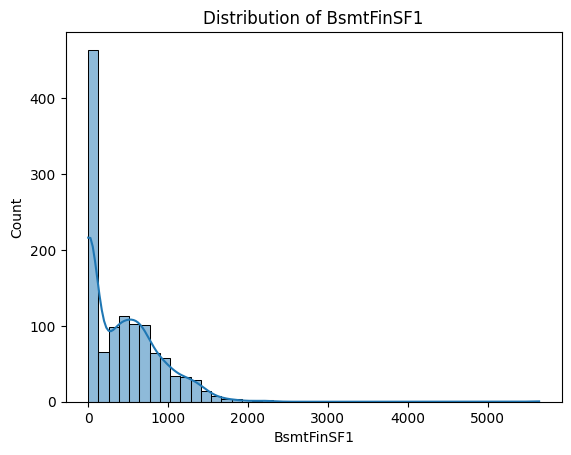

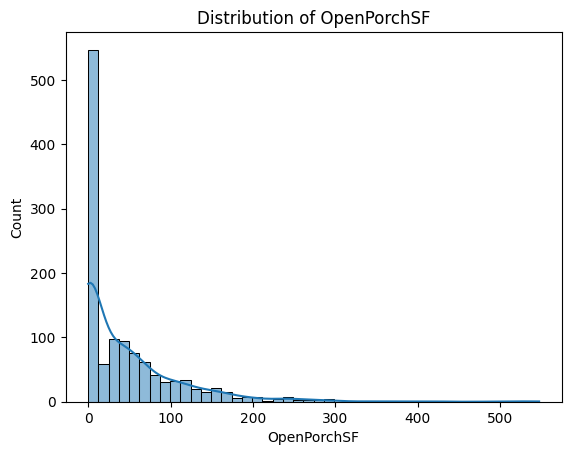

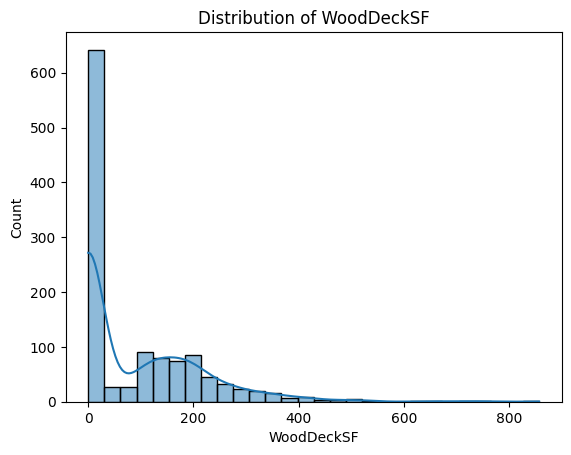

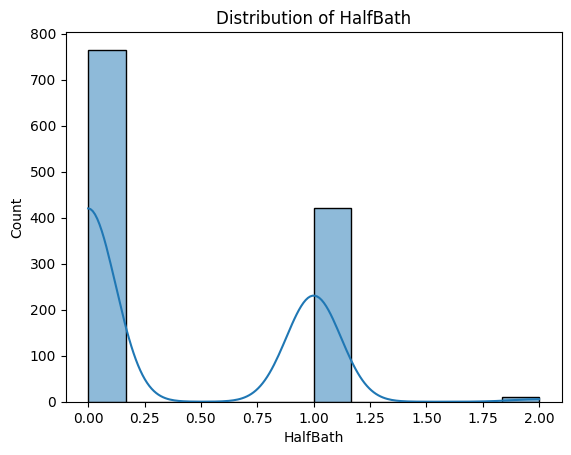

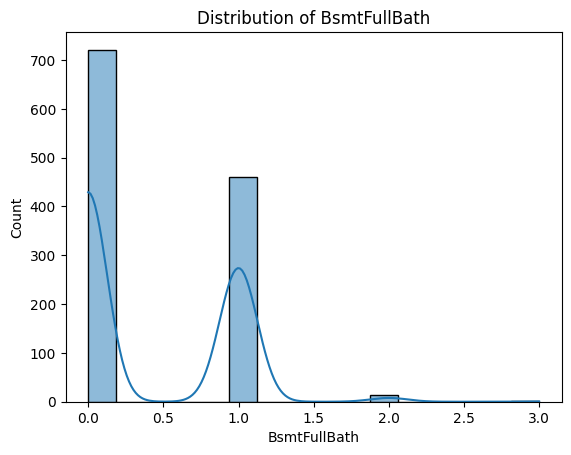

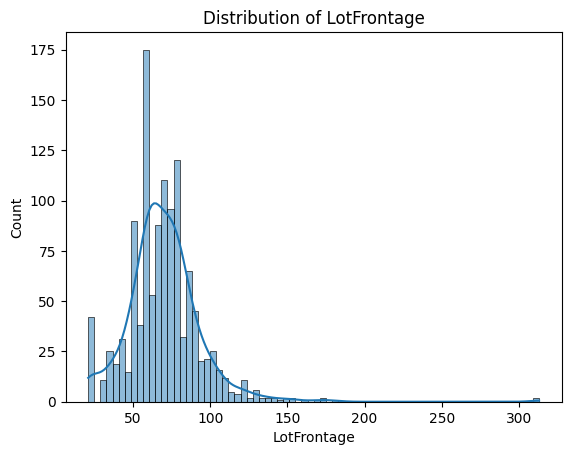

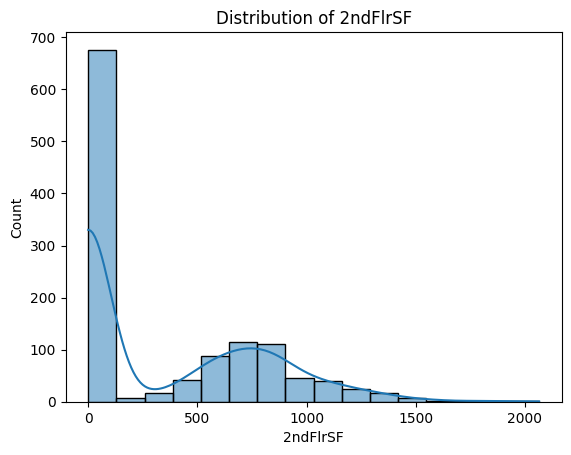

In [27]:
##Distribution Plots:-Understand skewness of numeric features:
for col in key_features:
    sns.histplot(df_subset[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

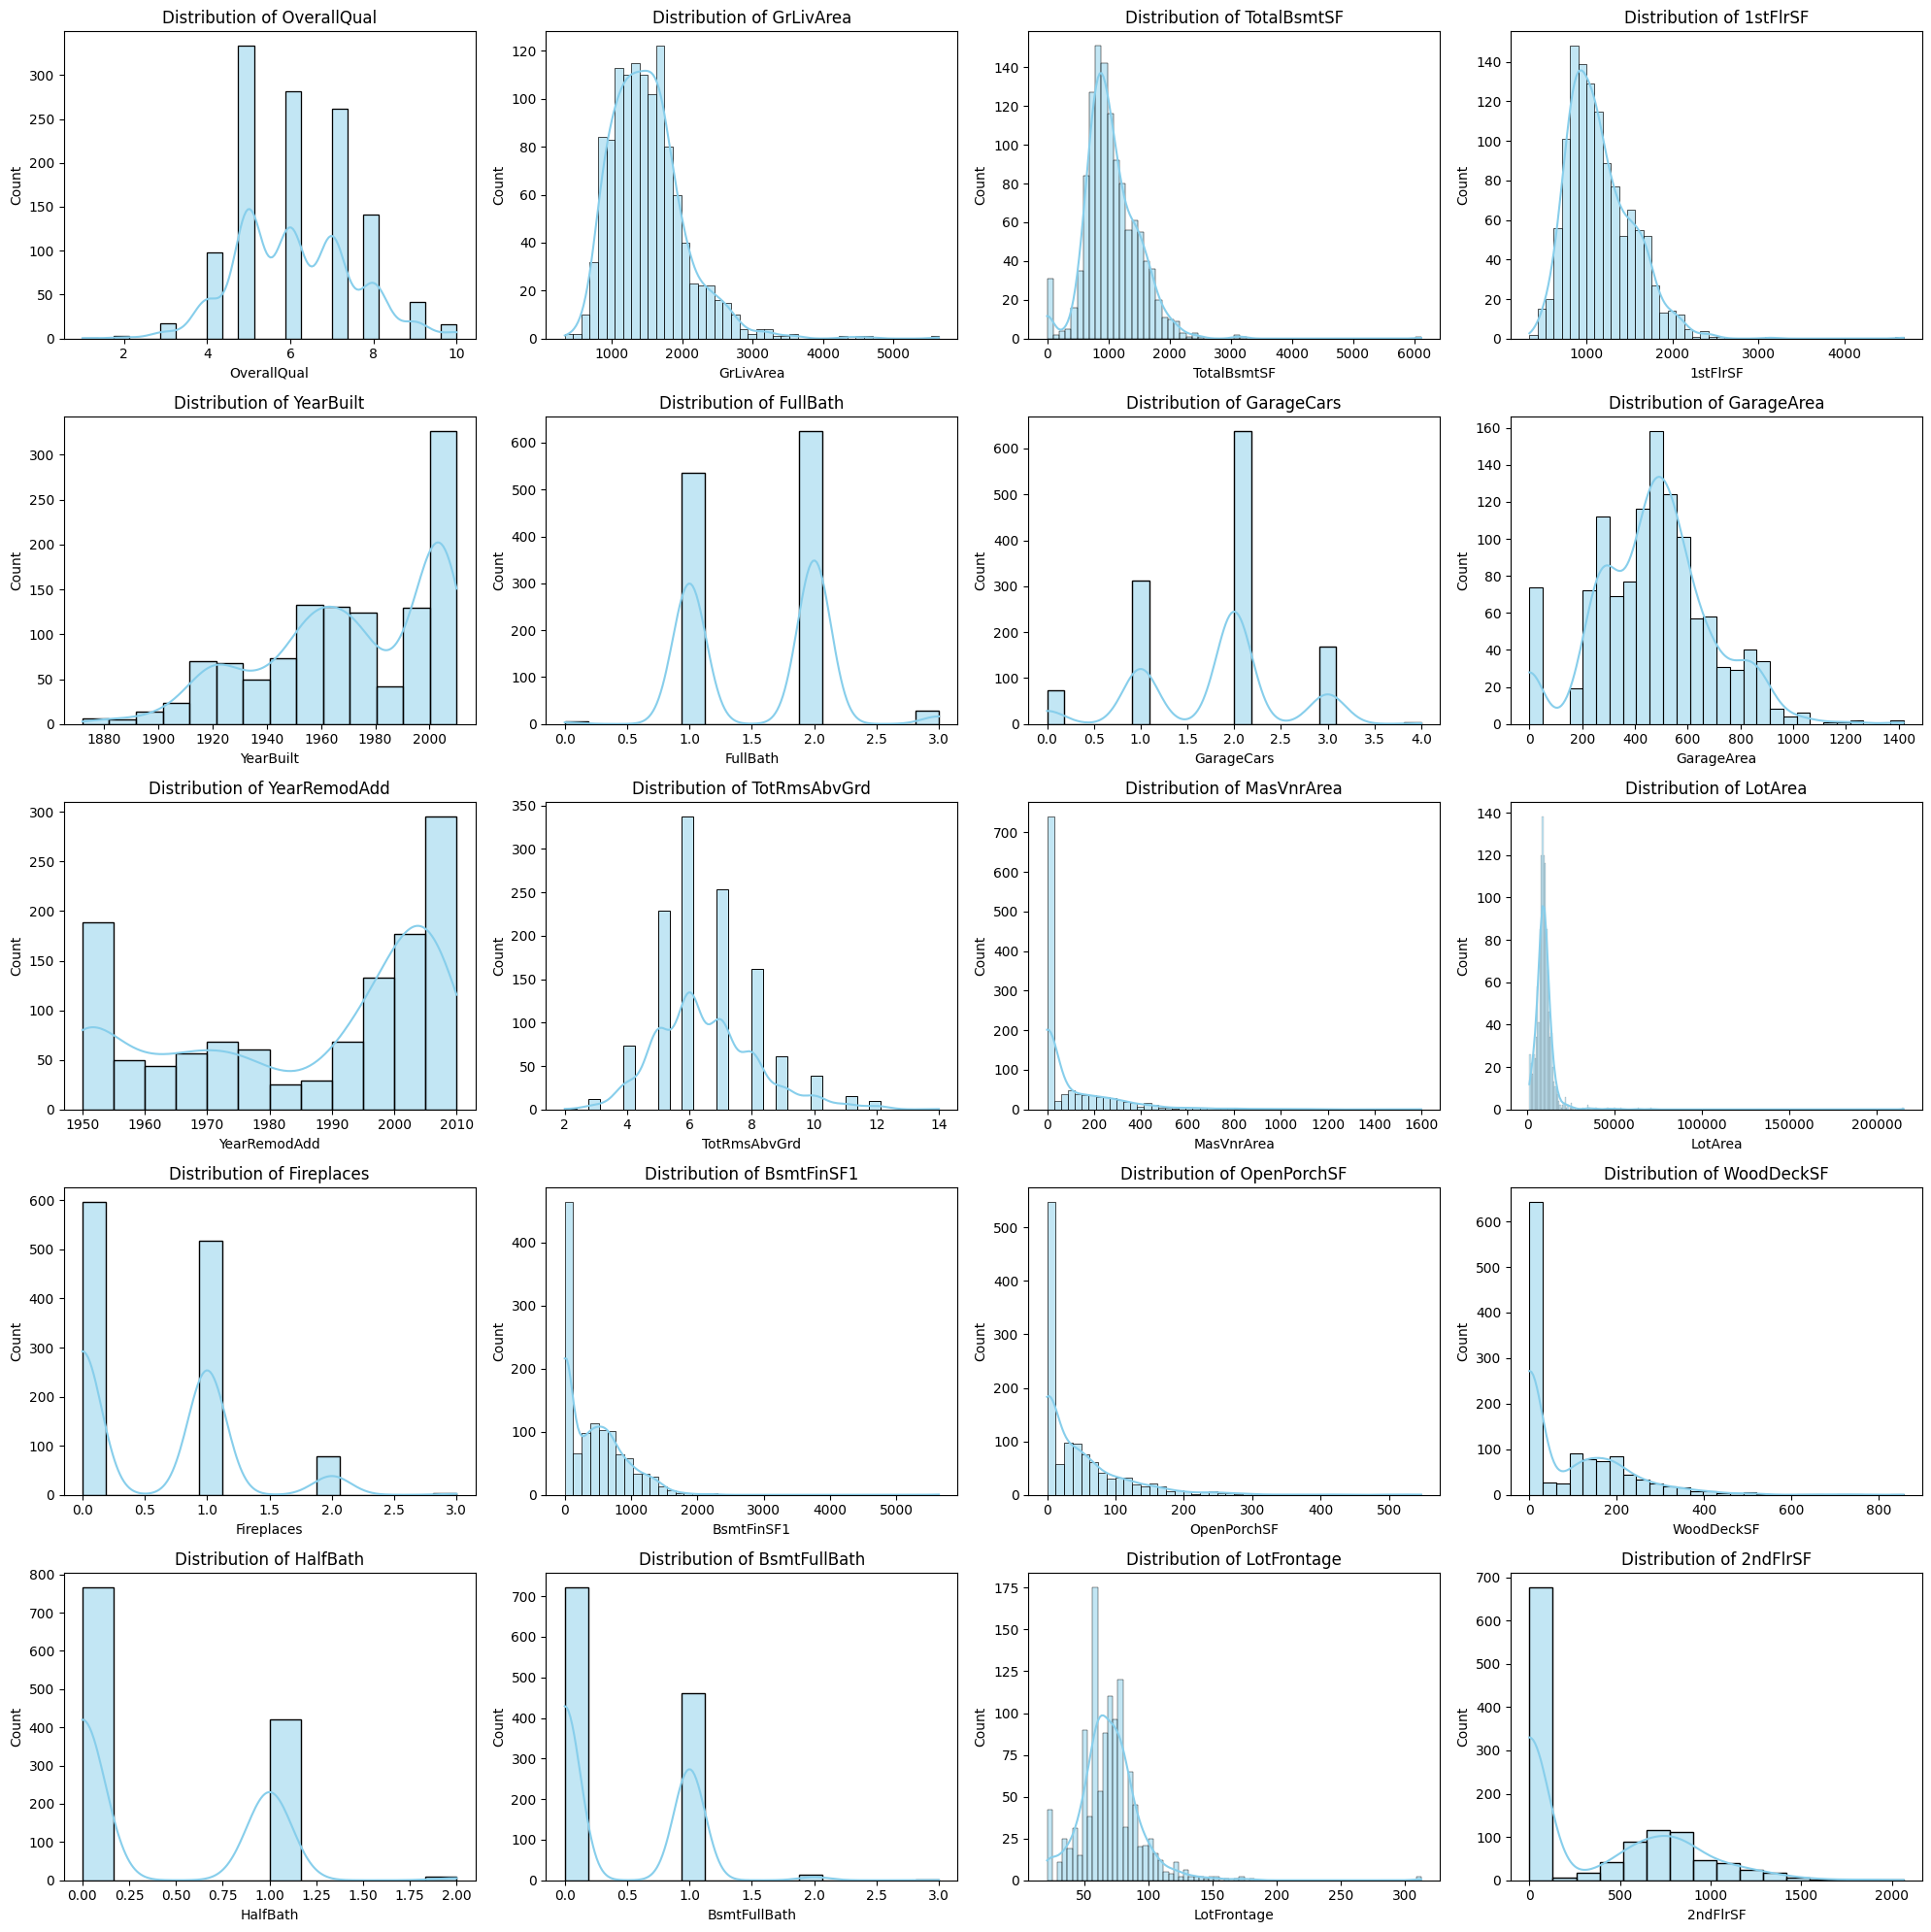

In [32]:
import math

# Number of features
n_features = len(key_features)

# Determine subplot grid size (e.g., 4 columns)
cols = 4
rows = math.ceil(n_features / cols)

# Set figure size
plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(key_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_subset[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

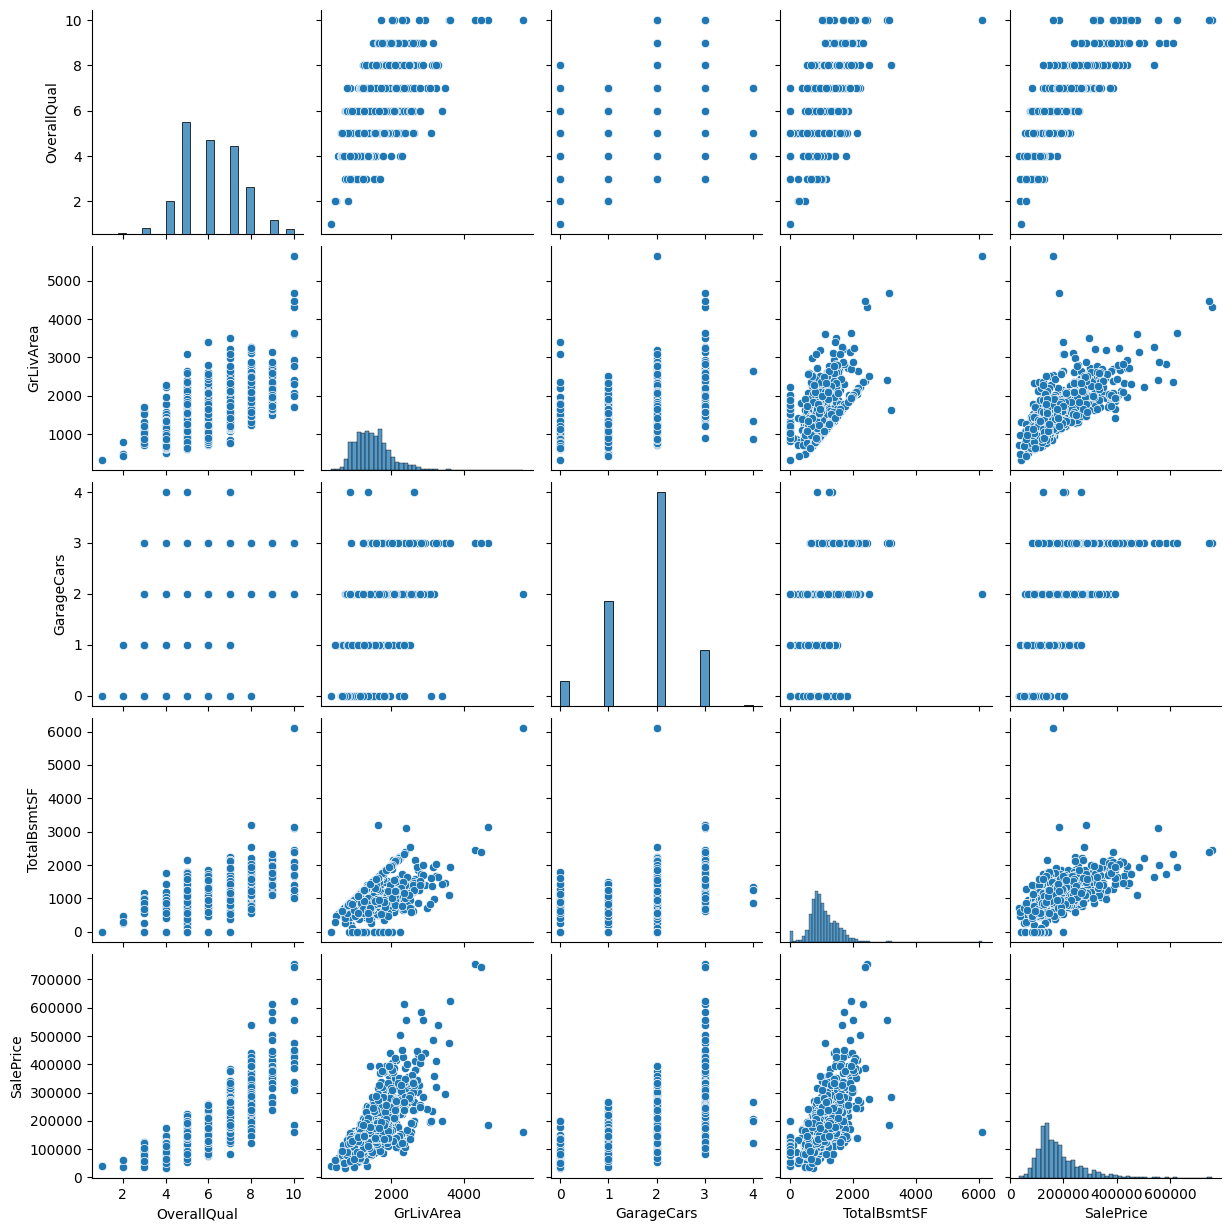

In [28]:
##Pairplot of Top Predictors:-Helps visualize pairwise relationships:

top5 = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "SalePrice"]
sns.pairplot(df_subset[top5])
plt.show()

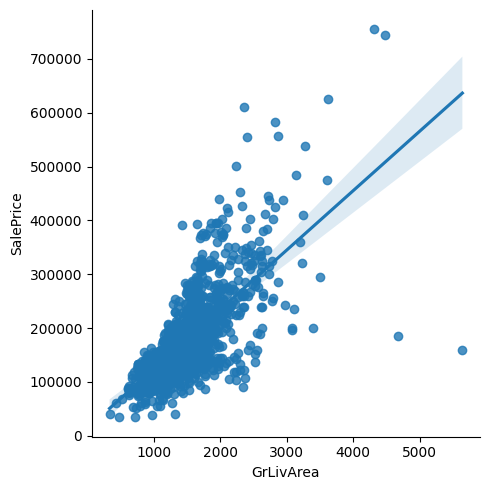

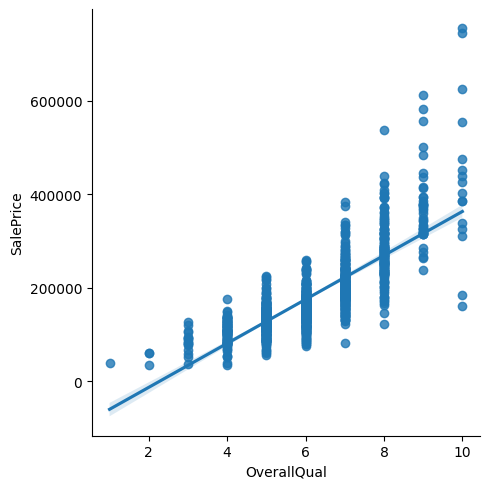

In [29]:
#SalePrice vs. Key Predictors:-Scatter plots with regression lines:

sns.lmplot(x="GrLivArea", y="SalePrice", data=df_subset)
sns.lmplot(x="OverallQual", y="SalePrice", data=df_subset)
plt.show()

In [9]:
#  Features & target
X = df_subset[key_features]
y = df["SalePrice"]


In [10]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [12]:
pca

PCA(n_components=0.95)

In [13]:
X_pca

array([[ 1.29698259, -1.2292264 , -1.03757778, ..., -0.01846131,
        -0.07553891, -0.13909675],
       [ 0.34719708,  1.25049346,  0.08423883, ..., -0.53362489,
        -1.07237351,  0.90682742],
       [ 1.41452156, -0.94280693, -0.78731527, ..., -0.4253731 ,
        -0.10899355, -0.02301483],
       ...,
       [ 1.0226671 , -2.27774268,  1.42755159, ..., -0.51192193,
         1.02034333,  0.44964574],
       [-1.98600796,  1.38416032, -0.12113742, ..., -0.02630171,
         0.87619448, -0.6712914 ],
       [-0.42882475,  1.35249198,  0.70828005, ...,  0.53056803,
        -0.9949991 , -0.43668223]])

In [23]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

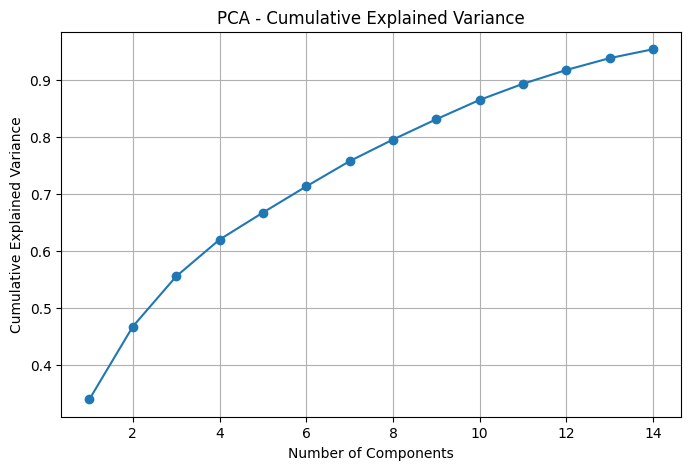

In [24]:
# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [18]:
# #  Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [14]:
print(f"Shape of X_pca: {X_pca.shape}")
print(f"Shape of y: {y.shape}")


Shape of X_pca: (1195, 14)
Shape of y: (1460,)


In [15]:
# First, ensure X_pca and y have the same number of samples
# Option 1: If you need to align the data
# Find the common indices between X_pca and y
import pandas as pd

# Assuming X_pca and y are DataFrames or can be converted to DataFrames
X_pca_df = pd.DataFrame(X_pca) if not isinstance(X_pca, pd.DataFrame) else X_pca
y_df = pd.DataFrame(y) if not isinstance(y, pd.DataFrame) else y

# Make sure they have the same index
common_indices = X_pca_df.index.intersection(y_df.index)

# Filter both datasets to only include common indices
X_pca_aligned = X_pca_df.loc[common_indices]
y_aligned = y_df.loc[common_indices]

# Now perform the train-test split with aligned data
X_train, X_test, y_train, y_test = train_test_split(X_pca_aligned, y_aligned, test_size=0.2, random_state=42)

# Option 2: If you know which dataset is correct and want to debug
# Print shapes to understand the mismatch
print(f"Shape of X_pca: {X_pca_aligned.shape}")
print(f"Shape of y: {y_aligned.shape}")

# Then fix the data before splitting
# [Choose the appropriate fix based on your data understanding]

Shape of X_pca: (1195, 14)
Shape of y: (1195, 1)


In [16]:
#  Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
# Predictions & evaluation
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: -0.011789148317046028
RMSE: 83360.48587694301


## Interpretation:
That R² (≈ -0.012) and RMSE (~ 83,360) mean the PCA + regression didn’t perform well — it’s essentially doing no better than predicting the mean price for all houses.

Here’s why this likely happened:

1. PCA loses predictive signal
PCA keeps directions of maximum variance, not maximum correlation with SalePrice.

So, the components may capture variance from irrelevant factors (e.g., lot size variance that doesn’t affect price much) and ignore subtle price-relevant patterns.

2. Real-life data is not purely linear
The Ames Housing dataset often benefits from non-linear models (Random Forest, Gradient Boosting, XGBoost) rather than plain linear regression, especially after PCA.

3. Too many variables kept
Keeping enough components for 95% variance here may still retain noise.

Sometimes keeping fewer components (e.g., top 5–10 PCs) can improve generalization.

## Regression model without PCA:

In [18]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1195, 20)
Shape of y: (1460,)


In [19]:
# Assuming X and y are DataFrames or can be converted to DataFrames
X_df = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
y_df = pd.DataFrame(y) if not isinstance(y, pd.DataFrame) else y

# Make sure they have the same index
common_indices = X_df.index.intersection(y_df.index)

# Filter both datasets to only include common indices
X_aligned = X_df.loc[common_indices]
y_aligned = y_df.loc[common_indices]

print(f"Shape of X_aligned: {X_aligned.shape}")
print(f"Shape of y_aligned: {y_aligned.shape}")


Shape of X_aligned: (1195, 20)
Shape of y_aligned: (1195, 1)


In [20]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X_aligned, y_aligned, test_size=0.2, random_state=42)
#  Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Predictions & evaluation
y_predictions = model.predict(X_test)
print("R²:", r2_score(y_test, y_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predictions)))

R²: 0.8242082931405648
RMSE: 37884.673054762585


## Interpretation:
Now that’s a huge improvement — an R² ≈ 0.824 means your model explains about 82% of the variance in sale prices, and an RMSE ≈ 37,885 is far better than before.

That performance difference tells us:

1. PCA was hurting performance before
When you skipped PCA (or reduced components wisely), you let the model directly use the most price-relevant features without compressing them into abstract components that might mix useful and useless variance.

2. Your features are strong predictors
The 20 selected Ames Housing variables have strong linear relationships with SalePrice, especially OverallQual, GrLivArea, GarageCars, etc. This allows a simple Linear Regression model to perform well without much feature engineering.

3. Interpretable Coefficients
Unlike PCA components, direct regression on these variables gives interpretable coefficients — you can say, for example, “For each additional garage space, sale price increases by $X, holding other factors constant.”



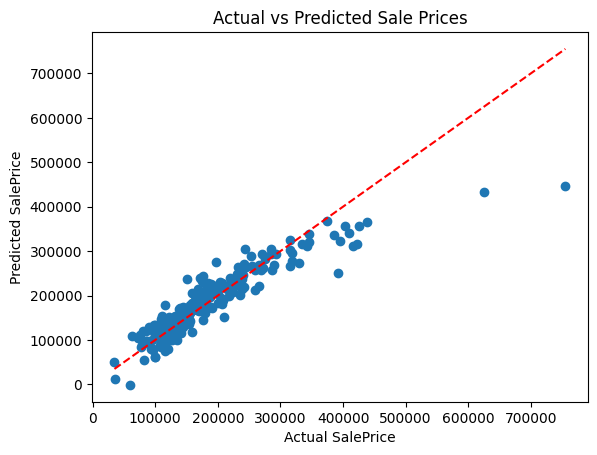

In [22]:

plt.scatter(y_test, y_predictions)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
